<h1><font color='tomato'>Plan your Airbnb Stay in NYC</font></h1>
<h5>Written & Published by Quoc-Anh Duong, Jul 22th 2019</h5>

### A few notes from the Author:

I built this notebook to show how I can deliver a full data analysis package using this tool. From searching public data, understanding and setting a meaningful goals to analyzing, visualizing and documenting.

In this project, I've utilized some of these following technical skills: 
- Loading (local file, online source, zipfile extract)
- Processing (formatting, transforming, merging, filtering, functions, sorting, etc.)
- Analysis (statistical summary, aggregation) 
- Visualization (matplotlib, geomap)
- Machine Learning (optimization)

I am inspired to enter the Data Science field, and I want to show you how I could to advance from practical business analyst to higher level of analytics and machine learning  

### Introduction:

Ever since Airbnb launched its hospitality service to the world, it's shaped the traveling experience of millions of peopple, bringing a whole new experience to both the host and the guest. To many people including myself, planning is half the fun of travel. And to many people including myself, the planning process is even more "fun" and intense when your time and budget are limited while trying to visit as many places as possible, whether it's for vacation or business purposes. A great big city like New York City requires careful planning, especially when it's your first time or when you have a few contraints and targets to meet. There are 3 factors that universally influence one's decision on booking a room:  
1. Price
2. Quality
3. Distance 

This Jupyter notebook is my attempt to help you plan the NYC trip. In particular, this notebook will provide you some useful information that might help you get the best out of your Airbnb expense. This exercise is built in a linear step-by-step fashion way, meaning the preceding input will have impact on the following ones. Here's how it works:

Within a price range and specific type of room, the first objective is using statistical analysis & visualization to point out areas in which the average score of all the listings in the area is higher than the average score in the city. The comparison is between various neighborhoods in NYC (all of Manhattan and area close to Manhattan in Brookly and Queens). Details about my analysis will be included in the notebook. 

After selecting the area, the notebook will ask you plan your itinerary to plan a full circle trip starting & ending from where you stay and visiting all the tourist attractions (you can edit this list too as well). As you may have guessed, the exercise's second objective is to draw the shortest itinerary. This notebook also has an optimization model to give you a small challenge to see if your itinerary plan is better than the model's. 

At this point, we've covered all 3 factors mentioned above and hopefully you will learn some new information and have some fun as much as I did when I wrote this notebook :)

Because the city is big and there are thousands of options to choose, I will draw some parameters, which are also the inputs I will use and analyze. All the comments I have in the notebook will be based on those inputs. And of course you can change the inputs as you wish.    

### Table of Contents:
- Data Import & Processing:
    - Import & Formatting Airbnb Data
    - Import & Merge NYC Geomap, Zipcode Latitude and Longtitude, Neighborhood Info and Tourist Attraction Data 
    - Merge Airbnb and NYC Geography Info Tables
- Input: 
    - Enter Price Range and Room Type
- Output: 
    - Prepare for Plotting
    - Visualize Statistical Analysis
    - Analysis
- Input: 
    - Enter Location
    - Process Input
    - List of Airbnb & Tourist Attraction Zipcode
- Input: 
    - Enter Itinerary
    - Process Input
- Preparation:
    - Prepare for plotting
    - Function to calculate distance
    - Function to convert index sequence to zipcode
- Output: 
    - Combine List of Attraction and the chosen Zipcode
    - Process Input
    - Calculate total Itinerary Distance
    - Prepare for Plotting
    - Visualize Itinerary on Map
- Optimization Model: 
    - Traveling Salesperson Model
    - Input Model Parameters
    - Calculate shortest Itinerary Distance
    - Visualize Itinerary on Map
    - Analysis
    - Find Optimal Parameters for the Optimization Model
- Conclusion:
    
### Input: 
Because there are too many type of listings with a wide range of price and selection, I will scale the analysis under these 2 initial following parameters:  

**(A)**. **The type of room**. In the analysis, I will choose **1 private bedroom**

**(B)**. **The price range**. In the analysis, I will choose **70** to **200** US dollars per night

**(C)**. **The location**. In the analysis, I will choose zipcode **11104**

**(D)**. **The itinerary**. The details of the itinerary will be shown in the notebook 

### Method:
- In this project, I use zip code to locate places. Each zip code will have an assigned coordinate, usually the centeroid of the area. As the result, the distance is the straight line distance between 2 coordinate points, therefore not taking roads and bridges into account. 
- To calculate distance, I use a the pgeocode library. Besides having a zipcode coordinate in the library, the library also has a function to calculate the distance between zipcodes.
- To caclulate the optimal itinerary, I use the mlrose library which contains a built-in function for Traveling Salesperson problem

### Public Data Source:
- I found a website http://insideairbnb.com which has public Airbnb data all over the world. Please check out the acknowledgement section of the wesbite
- The NYC geomap is downloaded from https://geo.nyu.edu, NYU Spatial Data Repository website. Please check out the website for more information
    
### Disclaimer: 
I use the data for self-teaching and skil demonstration purpose only and not for any commercial or political purposes. I do not own the data nor have any inttention to disclose any private information. Except self-created data, any public data source is cited. I also cite any code block that I copied from the Internet.


### Github Repository: https://github.com/dqa611/Airbnb_NYC_analysis/
### Before you start, change the directory of the Github clone folder below

In [1]:
local_dic = "C:/Users/anhqu/OneDrive/Documents/GitHub/Airbnb_NYC_analysis/"

### If you don't have any of these libraries below, please install !pip install _library_ 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # to create manual legend plot
import seaborn as sns           
import shapefile as shp         # to read dbf polygon file
import pgeocode                 # to caclulate distance between zipcodes https://pypi.org/project/pgeocode/
import geopandas as gpd         # to plot geomap
import mlrose                   # to solve optimization problems
from IPython.display import display, HTML # to change cell output style 

%matplotlib inline

C:\Users\anhqu\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
# Constant vaue(s) used throughout the analysis
km_to_mile = 0.621371

#  <font color='tomato'>Data Import and Processing:</font>    
### Airbnb Data

In [4]:
# http://insideairbnb.com/get-the-data.html
raw_data = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2019-06-02/data/listings.csv.gz')
df = raw_data

C:\Users\anhqu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


###### Data Overview

In [5]:
# Because the data has hundreds of columns, I tranpose the table to read the columns name easier 
pd.options.display.max_rows = 1000
np.transpose(df[:2])

,0,1
id,2539,2595
listing_url,https://www.airbnb.com/rooms/2539,https://www.airbnb.com/rooms/2595
scrape_id,20190602163209,20190602163209
last_scraped,2019-06-03,2019-06-03
name,Clean & quiet apt home by the park,Skylit Midtown Castle
summary,Renovated apt home in elevator building.,"Find your romantic getaway to this beautiful, ..."
space,"Spacious, renovated, and clean apt home, one b...","- Spacious (500+ft²), immaculate and nicely fu..."
description,Renovated apt home in elevator building. Spaci...,"Find your romantic getaway to this beautiful, ..."
experiences_offered,none,none
neighborhood_overview,Close to Prospect Park and Historic Ditmas Park,Centrally located in the heart of Manhattan ju...


##### Format Columns

Remove the dollar sign in the numeric columns

In [6]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['weekly_price'] = df['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
df['monthly_price'] = df['monthly_price'].replace('[\$,]', '', regex=True).astype(float)
df['security_deposit'] = df['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df['cleaning_fee'] = df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
df['extra_people'] = df['extra_people'].replace('[\$,]', '', regex=True).astype(float)

Fix the zipcode column


In [7]:
#remove NaNs
df = df[df.zipcode.notnull()].reset_index(drop=True)

#convert zipcode column to string
df['zipcode'] = df['zipcode'].astype(str)

#some zipcodes are formatted XXXXX.0 even after being converted to string. Remove '.0'
df['zipcode'] = df['zipcode'].str.split('.', expand=True)

#some zipcodes are formatted NY-XXXXX. Remove them
df = df[df['zipcode'].apply(lambda x: len(x) ==5)].reset_index(drop=True)

#remove any zipcode that is not in the NYC area (first number is not 1)
df = df[(df['zipcode'].str[:1] == '1')]

### NYC Map & Info Data

#### Import NYC dbf geomap file from:  https://geo.nyu.edu/catalog/nyu-2451-34509

In [8]:
# Extract Zipfile https://stackoverflow.com/questions/3451111/unzipping-files-in-python
import requests, zipfile, io 

z = zipfile.ZipFile(local_dic + "nyu_2451_34509.zip",'r')
z.extractall(local_dic)
nyc_shp = (local_dic + "nyu_2451_34509/nyu_2451_34509.dbf")

nyc_zipcode_geo = gpd.read_file(nyc_shp)

#### Import Zipcode Longtitude and Lattitude 

In [9]:
nomi = pgeocode.Nominatim('us')

zipcode_coord_untransposed = nomi.query_postal_code(nyc_zipcode_geo['zcta'][0])

for i in range(len(nyc_zipcode_geo)):
    add_coord_data = nomi.query_postal_code(nyc_zipcode_geo['zcta'][i])
    zipcode_coord_untransposed = pd.concat([pd.DataFrame(zipcode_coord_untransposed), pd.DataFrame(add_coord_data)], axis=1)
    
# Tranpose the table
# Drop the first duplicated row
zipcode_coord = zipcode_coord_untransposed.transpose()[1:]

##### <font color='green'>**Comment**</font>   
- The pgeocode library contains a list of zipcode coordinate
- The coordinates could be an estimate (1) or centeroid (6),  which is indicated by the accuracy field

#### Import Neighborhood Data

In [10]:
neighborhood = pd.read_csv(local_dic + 'NYC_zipcode_neighborhood.csv') # this a self-created file I created
neighborhood['Zipcode'] = neighborhood['Zipcode'].astype(str)

nyc_zipcode_geo = nyc_zipcode_geo.merge(neighborhood, left_on='zcta', right_on='Zipcode', how='left')
nyc_zipcode_geo = nyc_zipcode_geo[nyc_zipcode_geo.columns[: len(nyc_zipcode_geo.columns)-1]]

##### <font color='green'>**Comment**</font>   
- A neighborhood could have multiple zipcodes covering the area
- I created this list so they are the areas that I'm going to include in the analysis. You can edit the list here

Merge the Zipcode Tables

In [11]:
nyc_zipcode = nyc_zipcode_geo.merge(zipcode_coord, left_on='zcta', right_on='postal_code')

Create a tuple column based on the Zipcode coordinate. The tuple will be used later on as input for the optimization model

In [12]:
nyc_zipcode['coordinate'] = nyc_zipcode[['latitude', 'longitude']].apply(tuple, axis=1)

Create Manhattan DF for plotting & Save the DF to dbf file for GeoPandas plotting

In [13]:
# http://www.newyorkzipcodes.com/city-manhattan/default.aspx
manhat_zipcode = pd.read_csv(local_dic +'Manhattan_zipcode.csv')
manhat_zipcode['Zipcode'] = manhat_zipcode['Zipcode'].astype(str)

manhat_geomap = nyc_zipcode.merge(right=manhat_zipcode, 
                           left_on='zcta', right_on='Zipcode',
                           how='inner')

manhat_geomap = manhat_geomap[manhat_geomap.columns[ : len(manhat_geomap.columns) - 2]]

manhat = gpd.GeoDataFrame(manhat_geomap, geometry='geometry')

manhat.to_file(local_dic + 'manhat.dbf')
manhat_geomap.to_csv(local_dic + 'manhat.csv')

#### Import List of Attractions

In [14]:
attractions = pd.read_csv(local_dic + 'NYC_tourist_attractions.csv') 
attractions['Zipcode'] = attractions['Zipcode'].astype(str)

Create an Attraction-only Table

In [15]:
# Merge the Attractions table to the nyc_zipcode table to retrieve more info
nyc_zipcode1 = pd.merge(left=nyc_zipcode, right=attractions[['Attractions']], 
                       left_on='zcta', right_on=attractions['Zipcode'], how='left')

# Create a table containing only atractions from the master nyc_zipcode table
attraction_df = nyc_zipcode1[nyc_zipcode1['Attractions'].notnull()].reset_index(drop=True)       

##### <font color='green'>**Comment**</font>   
- Each attraction will be assigned by the zipcode of its address, the zipcode coordinate is populated from the library above  
- I created this list so they are the attractions that I'm going to include in the analysis. You can edit the list here

###### Merge Airbnb Table to the Geomap file by Zipcode

In [16]:
df_unagg = pd.merge(left=df, right=nyc_zipcode, how='inner', left_on='zipcode', right_on='zcta')

# Remove the coordinate tuple column 
df_unagg = df_unagg[df_unagg.columns[: (len(df_unagg.columns) - 1 )]]

#  <font color='tomato'>Input:</font>    
### Enter Price Range and Room Type

##### <font color='green'>**Comment**</font>   
- The price range I'm going to input is 70 to 200 US dollar
- The type of room I'm going to input is one private bedroom 
- The area I'm going to include is in the neighborhood list

In [17]:
your_min_price = input('select your minimum price: ')
your_max_price = input('select your maximum price: ')

select your minimum price: 70
select your maximum price: 200


In [18]:
# Filter Listings in desired area
df_filtered = df_unagg[df_unagg['Neighborhood'].notnull()]

# Filer type of Room 
df_filtered = df_filtered[(df_filtered['calculated_host_listings_count_private_rooms']==1) &
         (df_filtered['price'] >= float(your_min_price)) & (df_filtered['price'] <=float(your_max_price))].reset_index()

#  <font color='tomato'>Output:</font>    
### Average Listing Rating Score by Neighborhood 

##### Pre-plotting Preparation

In [19]:
# Sort the boxplot by median
price_median_neighborhood = df_filtered.groupby(['Neighborhood'])['price'].median()
boxplot_sorted_median = price_median_neighborhood.sort_values(axis=0, ascending=True, inplace=False).keys().tolist()

# color code the Borough
def color_series(borough):
    if borough == 'Manhattan': return 'deepskyblue'
    if borough == 'Queens': return 'darkgreen'
    if borough == 'Brooklyn': return 'steelblue'
    if borough == 'Island': return 'olive'

# Convert the Sorted Neighborhood to DF and Populate Borough column 
sorted_neighborhood = pd.DataFrame(boxplot_sorted_median)
sorted_neighborhood.columns = ['Neighborhood']
sorted_neighborhood = sorted_neighborhood.merge(neighborhood[['Neighborhood', 'Borough']], on='Neighborhood').\
                        drop_duplicates(keep='first').reset_index(drop=True)

color_series1 = sorted_neighborhood['Borough'].apply(lambda borough: color_series(borough))

color_series_plot = color_series1.reset_index(drop=True).tolist()
sorted_neighborhood['color'] = color_series_plot

##### Visualization

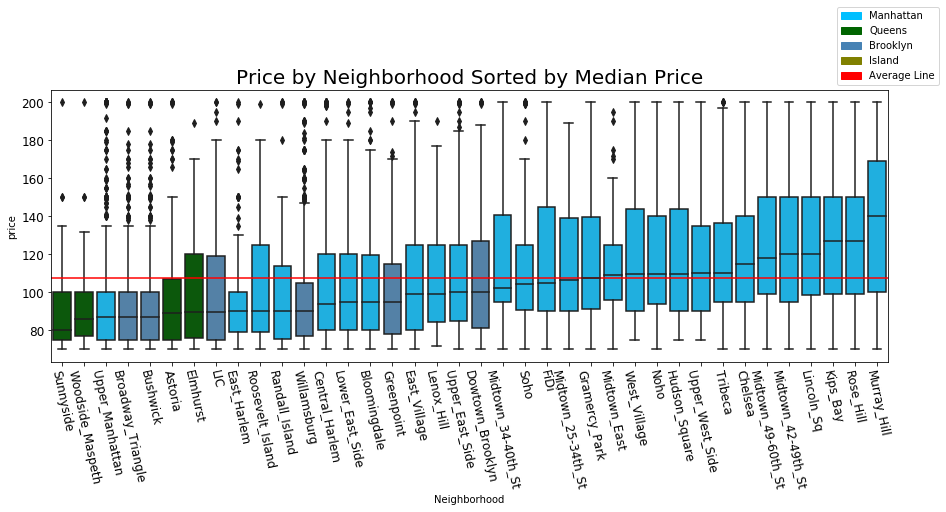

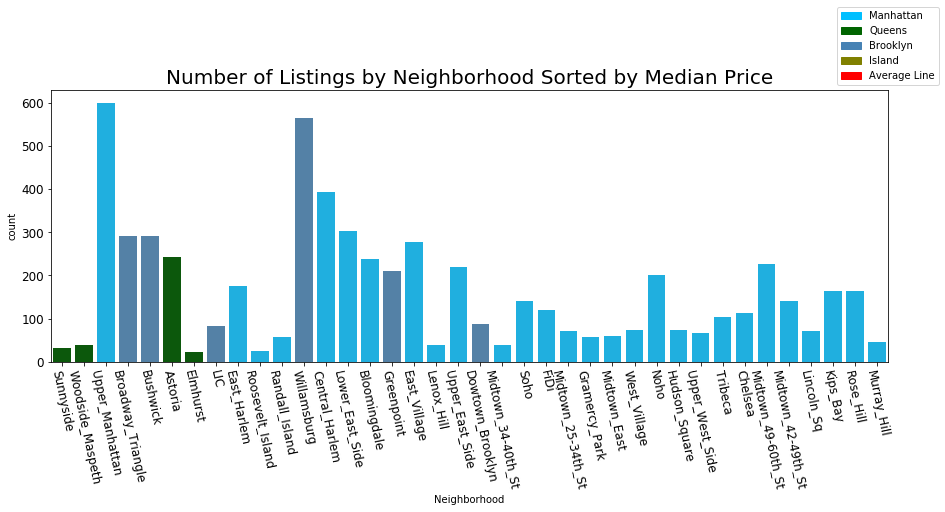

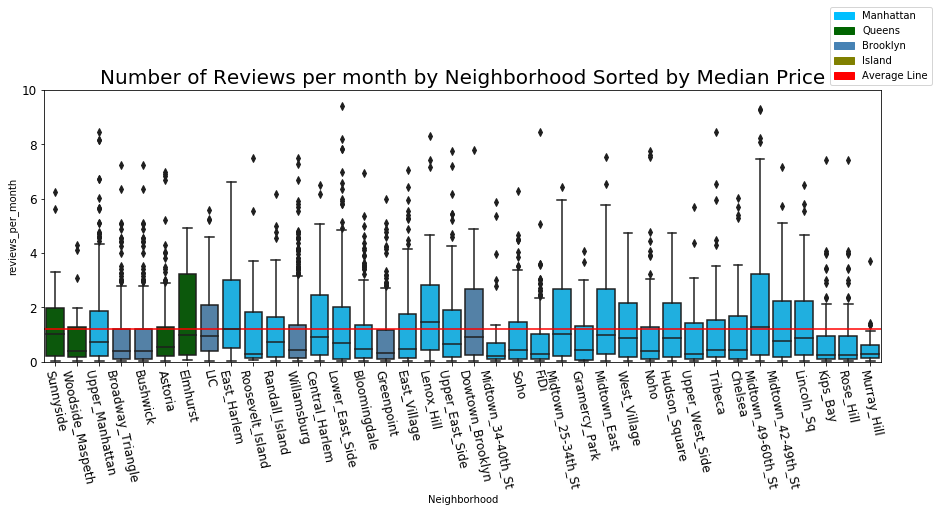

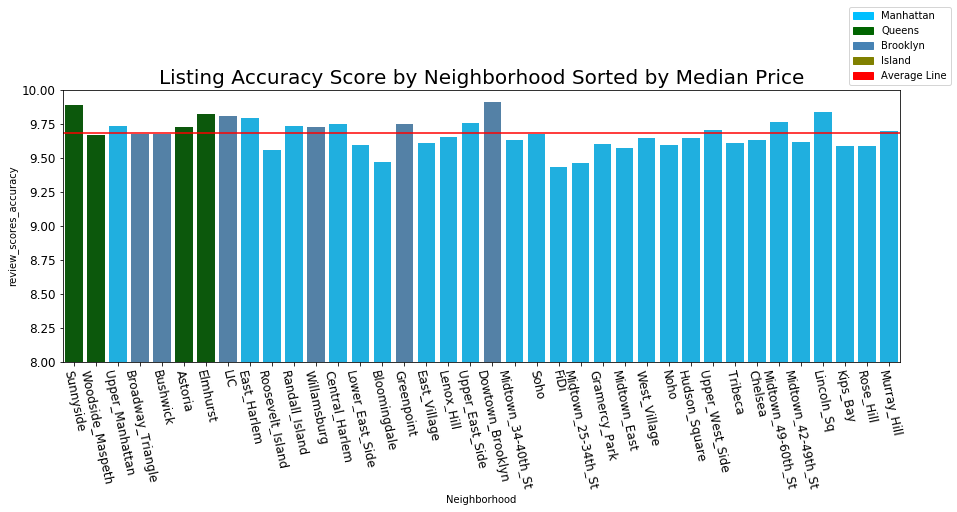

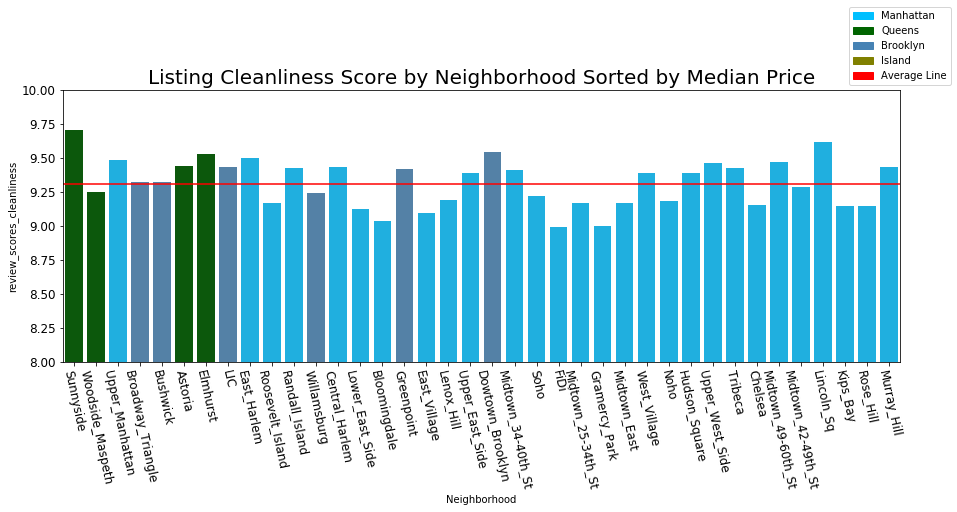

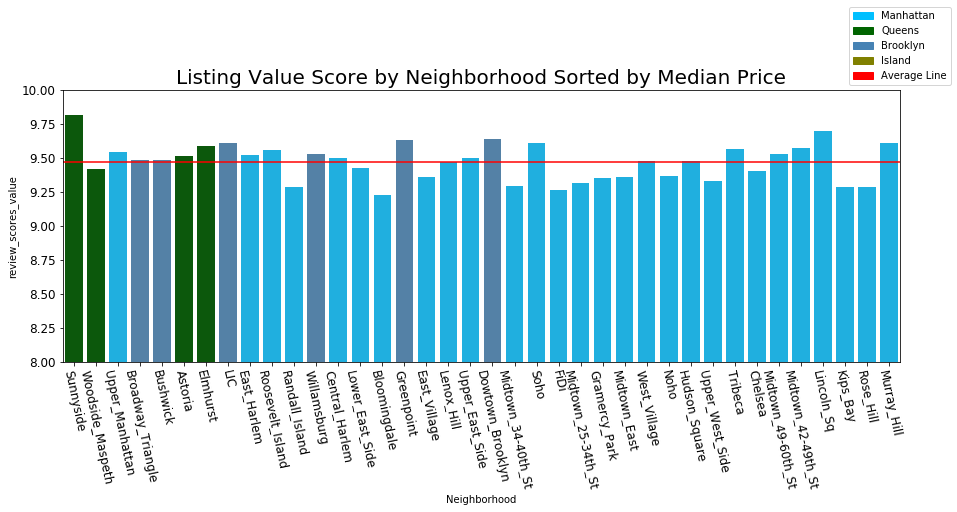

In [20]:
# Plot figure Size
plt.figure(figsize=(15,5))

# Plot legend
manhat_patch = mpatches.Patch(color='deepskyblue', label='Manhattan')
queens_patch = mpatches.Patch(color='darkgreen', label='Queens')
brooklyn_patch = mpatches.Patch(color='steelblue', label='Brooklyn')
island_patch = mpatches.Patch(color='olive', label='Island')
average_line = mpatches.Patch(color='r', label='Average Line')
handles = [manhat_patch, queens_patch, brooklyn_patch, island_patch, average_line]


                            # Price Boxplot
ax = sns.boxplot(x='Neighborhood', y='price', data=df_filtered, 
                 order= boxplot_sorted_median, palette=color_series_plot)

# Draw an average horizontal line
# Format the plot
plt.axhline(y=df_filtered['price'].mean(), color='r', linestyle='-')
plt.title('Price by Neighborhood Sorted by Median Price', color='black', fontsize=20)
plt.xticks(rotation=-78, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.legend(handles=handles,
          loc='lower center', bbox_to_anchor=(1, 1), ncol=1)

                        # Number of Listings Boxplot
plt.figure(figsize=(15,5))

ax = sns.countplot(x='Neighborhood', data=df_filtered, 
                 order= boxplot_sorted_median, palette=color_series_plot)

# Format the plot
plt.title('Number of Listings by Neighborhood Sorted by Median Price', color='black', fontsize=20)
plt.xticks(rotation=-78, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.legend(handles=handles,
          loc='lower center', bbox_to_anchor=(1, 1), ncol=1)


                            # Reviews per month
plt.figure(figsize=(15,5))

ax = sns.boxplot(x='Neighborhood', y='reviews_per_month', data=df_filtered, 
                 order= boxplot_sorted_median, palette=color_series_plot)

# Draw an average horizontal line
# Format the plot
plt.axhline(y=df_filtered['reviews_per_month'].mean(), color='r', linestyle='-')
plt.title('Number of Reviews per month by Neighborhood Sorted by Median Price', color='black', fontsize=20)
plt.xticks(rotation=-78, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.ylim([0, 10])
plt.legend(handles=handles,
          loc='lower center', bbox_to_anchor=(1, 1), ncol=1)


                        # Host score quality Boxplot
plt.figure(figsize=(15,5))

neighborhood_score_accuracy = df_filtered.groupby(['Neighborhood'])['review_scores_accuracy'].mean().reset_index()

sns.barplot(x='Neighborhood', y='review_scores_accuracy', 
            data=neighborhood_score_accuracy, order= boxplot_sorted_median, palette=color_series_plot)

# Draw an average horizontal line
# Format the plot
plt.axhline(y=df_filtered['review_scores_accuracy'].mean(), color='r', linestyle='-')
plt.title('Listing Accuracy Score by Neighborhood Sorted by Median Price', color='black', fontsize=20)
plt.xticks(rotation=-78, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.ylim([8, 10])
plt.legend(handles=handles,
          loc='lower center', bbox_to_anchor=(1, 1), ncol=1)


                        # Host score quality Boxplot
plt.figure(figsize=(15,5))

neighborhood_score_accuracy = df_filtered.groupby(['Neighborhood'])['review_scores_cleanliness'].mean().reset_index()

sns.barplot(x='Neighborhood', y='review_scores_cleanliness', 
            data=neighborhood_score_accuracy, order= boxplot_sorted_median, palette=color_series_plot)

# Draw an average horizontal line
# Format the plot
plt.axhline(y=df_filtered['review_scores_cleanliness'].mean(), color='r', linestyle='-')
plt.title('Listing Cleanliness Score by Neighborhood Sorted by Median Price', color='black', fontsize=20)
plt.xticks(rotation=-78, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.ylim([8, 10])
plt.legend(handles=handles,
          loc='lower center', bbox_to_anchor=(1, 1), ncol=1)


                        # Host score quality Boxplot
plt.figure(figsize=(15,5))

neighborhood_score_accuracy = df_filtered.groupby(['Neighborhood'])['review_scores_value'].mean().reset_index()

sns.barplot(x='Neighborhood', y='review_scores_value', 
            data=neighborhood_score_accuracy, order= boxplot_sorted_median, palette=color_series_plot)

# Draw an average horizontal line
# Format the plot
plt.axhline(y=df_filtered['review_scores_value'].mean(), color='r', linestyle='-')
plt.title('Listing Value Score by Neighborhood Sorted by Median Price', color='black', fontsize=20)
plt.xticks(rotation=-78, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.ylim([8, 10])
plt.legend(handles=handles,
          loc='lower center', bbox_to_anchor=(1, 1), ncol=1)

### <font color='royalblue'>Analysis:</font>   

As you can see, there are 6 plots by Neighborhood which are sorted by median price per night. The borough is color coded as shown in the legend and the red line is the mean value of these neighorhoods. To avoid simplicity and bias, I chose these 3 rating scores (accuracy, cleanliness and value) as opposed to one overall rating score. The overall rating score is an average score of 5 ratings scores including location score, so I don't want to use neither of them. The distance factor will be considered in the second half of the project anyway. 

As you might have guessed, any neighborhood below Central Park has significantly higher price than Upper Manhattan, Brooklyn, Queens, Roosevelt and Randall Island. However, in this price range and type of room, the number of listings in "hot" area in Manhattan is not as many as other places. Also, there seems to be a large number of listings in Upper Manhattan and Williamsburg, but that is because those area in terms of size is much greater than Kips Bay for example. However, the size difference shouldn't skew the analysis by a lot.

The reviews per month plot says a lot about the quality of the listings in the area because Airbnb encourages guests to rate and leave feedback to the host to create a give-and-take community. For example, Willamsburg has a large number of listings, but the average number of review per month is only 1. There are 2 explanations. (1): Willamsburg area provides a lot of decent rooms but the quality is neither so good nor so bad that that previous guests didn't want to spend 5-10 minutes to review it. Or (2): Willamsburg has a lot of rooms but the renting frequency is not high, even though the average is lower than the of the city's. However, noted that Willamsburg a large area, so the outliers might be the listings located near East River yet the average is skewed by unoccupied rooms farther East. Anyhow, what causes the number of reviews in this area so low is beyond the scope of the analysis.

Another example is Midtown neighborhood from 25th to 34th St. For a very small number of listings in comparison to other neighborhood in the island, the rooms there sure receive a lot of reviews, and they seem to be bad reviews, as seen in the rating score barplots. In contrast, Midtown from 49th to 60th and Lincoln Sq receive many good reviews, even though their average price is similar to those in 25-34th St. This might be a sweet spot, but you still have to pay higher than average for this quality in the city.  

Surprisingly, Harlem area can provide the same above-average room quality in Manhattan but less pricy, plus their number of listings are quite enough for you to choose around. However, these areas, of course, are farther away from the city center obviously. 

Overall, among price, quality and distance, you can always get at most 2 out 3, and it's your choice to decide which 2 you want to take. There's another factor, or a sub-factor of the quality factor, that the data is not available here is the room size. Manhattan apartment rooms can be as brutally small as a closet. If size is available, I'm sure we can do even further interesting analysis. If you ever find a place with all qualities above, please kindly share it to me too :) 

# <font color='tomato'>Input:</font>    
### Enter Location

##### <font color='green'>Comment:</font>   

Moving on to the next analysis, for location, I'm going to choose the neighborhood with the lowest average price among other included neighborhood aboved, which is Sunnyside. The zipcode is 11104. 

In [21]:
print('the list of neighborhood sorted by median price per night: \n')
print(boxplot_sorted_median)

insert_neighborhood = input('\n Please select one neighborhood: ')
print('The zipcode(s) in this neighborhood are: \n' + 
      str(nyc_zipcode[nyc_zipcode['Neighborhood'] == insert_neighborhood]['zcta']) + 
      '\n Please select one zipcode for the input below \n')

the list of neighborhood sorted by median price per night: 

['Sunnyside', 'Woodside_Maspeth', 'Upper_Manhattan', 'Broadway_Triangle', 'Bushwick', 'Astoria', 'Elmhurst', 'LIC', 'East_Harlem', 'Roosevelt_Island', 'Randall_Island', 'Willamsburg', 'Central_Harlem', 'Lower_East_Side', 'Bloomingdale', 'Greenpoint', 'East_Village', 'Lenox_Hill', 'Upper_East_Side', 'Dowtown_Brooklyn', 'Midtown_34-40th_St', 'Soho', 'FiDi', 'Midtown_25-34th_St', 'Gramercy_Park', 'Midtown_East', 'West_Village', 'Noho', 'Hudson_Square', 'Upper_West_Side', 'Tribeca', 'Chelsea', 'Midtown_49-60th_St', 'Midtown_42-49th_St', 'Lincoln_Sq', 'Kips_Bay', 'Rose_Hill', 'Murray_Hill']

 Please select one neighborhood: Sunnyside
The zipcode(s) in this neighborhood are: 
119    11104
Name: zcta, dtype: object
 Please select one zipcode for the input below 



In [22]:
#Zipcode format is 5-digit string or number
def insert_airbnb_zipcode(zipcode):
    if (str(zipcode).isdigit()) & (len(str(zipcode)) == 5): 
        global yourairbnb_zipcode
        yourairbnb_zipcode = str(zipcode).strip()
        return print('Your airbnb zipcode is ' +  yourairbnb_zipcode)
    else: 
        return print('Your zipcode format is incorrect')

Insert your Airbnb zipcode here (5-digit number): 11104
Your airbnb zipcode is 11104


Text(0.5, 1.0, 'Your Airbnb room is in the highlighted area')

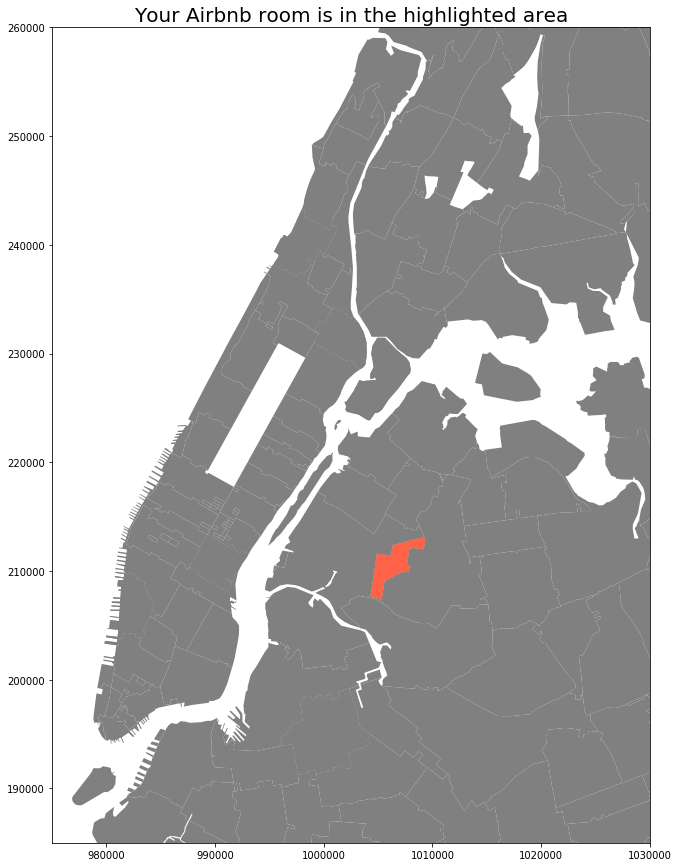

In [23]:
zipcode = input('Insert your Airbnb zipcode here (5-digit number): ')
insert_airbnb_zipcode(zipcode)

plt.figure(figsize=(15,15))

ax = plt.subplot()
x1 = nyc_zipcode.plot(ax=ax, color='grey')
x5 = nyc_zipcode[nyc_zipcode['zcta'] == zipcode].plot(ax=ax, color='tomato')

plt.ylim([185000, 260000])
plt.xlim([975000, 1030000])
plt.title("Your Airbnb room is in the highlighted area", fontsize=20, color='black')


#### Processing Input

Create your Airbnb Coordinate

In [24]:
# Create Airbnb zipcode cooridnate
yourairbnb_coord = nyc_zipcode.loc[nyc_zipcode['zcta'] == yourairbnb_zipcode, 
                                   'coordinate'].iloc[0]
your_airbnb = ['Your_airbnb']
your_airbnb.append(yourairbnb_coord)

Add your Airbnb Coordinate to the Attraction Table

In [25]:
attraction_coords = attraction_df[['zcta', 'Attractions','coordinate']]

# This makes sure we always delete the Airbnb row from previous iteration
attraction_coords[attraction_coords['Attractions'] != 'Your Airbnb']

# Create a new Airbnb row
your_airbnb_row = pd.DataFrame({'zcta': yourairbnb_zipcode, 
                                'Attractions': 'Your Airbnb', 
                                'coordinate': [(yourairbnb_coord)]})

# Add the Airbnb row to the DF
attraction_coords = pd.concat([your_airbnb_row, attraction_coords]).reset_index(drop=True)

# Create a coordinate-only list for optimization model 
coords_list = [list([attraction_coords['Attractions'][i],
                     attraction_coords['coordinate'][i]]) 
               for i in range(len(attraction_coords))]

#### List of Attractions & Your Aibnb

In [26]:
attraction_coords

,zcta,Attractions,coordinate
0,11104,Your Airbnb,"(40.7436, -73.9216)"
1,10001,Empire State Building,"(40.7484, -73.9967)"
2,10005,Wall St / Statue of Liberty,"(40.7056, -74.0083)"
3,10007,One Trade Center,"(40.7139, -74.007)"
4,10011,Chelsea Market / High Line,"(40.7402, -73.9996)"
5,10012,Washington Square Park / NYU,"(40.7255, -73.9983)"
6,10017,Grand Central,"(40.7517, -73.9707)"
7,10018,Bryant Park,"(40.7547, -73.9925)"
8,10019,Columbus Circle / Fordham,"(40.7651, -73.9858)"
9,10027,Harlem / Columbia University,"(40.8116, -73.955)"


##### <font color='green'>Comment:</font>   

From this point, the sequence of the itinerary is according to the index in this table. For example, if the value of the first index in a list of sequence is 0, that means the Airbnb Zipcode. If the second index value is 10, it means MET, according to the table above  

# <font color='tomato'>Input:</font>    
### Plan Your Itinerary

##### <font color='green'>Comment:</font>     
    
- From this the attraction table above, enter the attraction visiting order starting from the Airbnb zipcode.
- You can type the keyword of the attraction. E.g Empire State Building can be 'empire'. Please make sure you type correctly and one time for each attractions. Separate the keywords by comma
- In the attraction list that I created, there are 13 attraction locations. If you use this list, please make sure you enter all 13 locations. If you want to add or remove location, change it here and now
- For my analysis, I'm going to put the sequence as following (by keyword): met, harlem, columbus, rockefeller, bryant, grand, times, empire, chelsea, nyu, one, wall, dumbo
- If you want to use my itinerary, copy and paste it to the cell below

In [27]:
your_attraction_raw_input = input("Enter your attraction visit order with keyword e.g Empire State Building can be input as empire \n Separated each value by comma \n")

Enter your attraction visit order with keyword e.g Empire State Building can be input as empire 
 Separated each value by comma 
met, harlem, columbus, rockefeller, bryant, grand, times, empire, chelsea, nyu, one, wall, dumbo


#### Processing Input

In [28]:
# split the input by comma
your_attraction_input = your_attraction_raw_input.split(',')

# format the string from both your input and the coordinate table
your_attraction_input1 = [str(your_attraction_input[i]).strip().lower() for i in range(len(your_attraction_input))]
attraction_coords['Attractions_lower'] = attraction_coords['Attractions'].str.lower()

# populate the zipcode from your input
your_attraction_input2 = [attraction_coords['zcta'][0]]
for i in range(len(your_attraction_input1)):
    your_attraction_input2.append(attraction_coords.loc[attraction_coords['Attractions_lower'].str.\
                                                    contains(your_attraction_input1[i]), 'zcta'].item())
    
# missing input attractions
missing_attraction = list(np.setdiff1d(attraction_coords['zcta'].tolist(), your_attraction_input2))
missing_list = attraction_coords['Attractions'][attraction_coords['zcta'].isin(missing_attraction)]

print('You have entered: \n')
print(your_attraction_raw_input +'\n')
print(str(your_attraction_input2) +'\n')
print(str(len(your_attraction_input)) + ' attractions out of ' 
          + str((len(attraction_coords) -1)))

You have entered: 

met, harlem, columbus, rockefeller, bryant, grand, times, empire, chelsea, nyu, one, wall, dumbo

['11104', '10028', '10027', '10019', '10111', '10018', '10017', '10036', '10001', '10011', '10012', '10007', '10005', '11201']

13 attractions out of 13


# <font color='tomato'>Preparation:</font>

### Prepare for Plotting

Create Attractions DF for plotting & Save the DF to dbf file for GeoPandas plotting

In [29]:
attractions_geomap = nyc_zipcode[nyc_zipcode['zcta'].isin(list(set(attraction_coords['zcta'])))]

attractions_geomap1 = attractions_geomap[attractions_geomap.columns[ : len(attractions_geomap.columns) - 1]]

tour_area0 = gpd.GeoDataFrame(attractions_geomap1, geometry='geometry')

tour_area0.to_file(local_dic + 'tour_area.dbf')

### Function: Calculate Distance between Zipcodes

In [30]:
# calculate the distance
def calc_distance(zipcode_order_list):
    dist = pgeocode.GeoDistance('us')
    distance_km = []
    for i in range(len(zipcode_order_list)): 
        distance_km.append(dist.query_postal_code(zipcode_order_list[i],
                                                  zipcode_order_list[i+1 if i+1<len(zipcode_order_list) 
                                                                                                 else 0]))

    distance_mile = [x * km_to_mile for x in distance_km]
    return round(sum(distance_mile),2)

### Function: Convert Attraction Order Index to Zipcode Order

In [31]:
def convert_seq_to_zipcode(attracion_seq):
    zipcode_seq = []
    for i in range(len(attracion_seq)):
        zipcode_seq.append(attraction_coords['zcta'][attracion_seq[i]])
    return zipcode_seq    

# <font color='tomato'>Output:</font>
### Visualize Itinerary on Map

Insert  Itinerary to the Distance Calculation Function

In [32]:
zipcode_order_list = your_attraction_input2

your_route_length = calc_distance(zipcode_order_list)

print_your_route_length = 'Your route length is ' + str(your_route_length) +  ' mile'

Populate the correct route order back to the tour_area df for plotting

In [33]:
your_route_order_table = pd.DataFrame(your_attraction_input2, columns=['zipcode']).reset_index()

# Merge the route_order table to the tour_area df
your_tour_area = tour_area0.merge(your_route_order_table, left_on='zcta', right_on='zipcode', how='left')
your_tour_area.rename(columns={'index': 'route_order'}, inplace=True)

###### Populate the Plot

Your route length is 22.77 mile


Your Trip Itinerary
met, harlem, columbus, rockefeller, bryant, grand, times, empire, chelsea, nyu, one, wall, dumbo


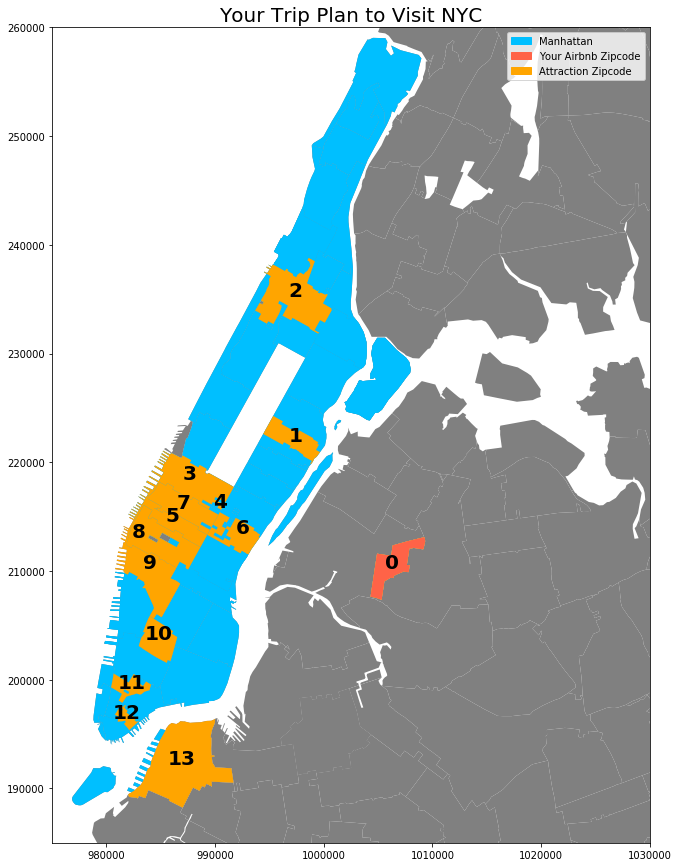

In [34]:
plt.figure(figsize=(15,15))

ax = plt.subplot()
x1 = nyc_zipcode.plot(ax=ax, color='grey')
x2 = manhat.plot(ax=ax, color='deepskyblue')
x3 = your_tour_area.plot(ax=ax, color='orange')
x4 = your_tour_area[your_tour_area['zcta'] == yourairbnb_zipcode].plot(ax=ax, color='tomato')

plt.ylim([185000, 260000])
plt.xlim([975000, 1030000])
plt.title("Your Trip Plan to Visit NYC", fontsize=20, color='black')

# label the legend
teal_patch = mpatches.Patch(color='deepskyblue', label='Manhattan')
red_patch = mpatches.Patch(color='tomato', label='Your Airbnb Zipcode')
orange_patch = mpatches.Patch(color='orange', label='Attraction Zipcode')

plt.legend(handles=[teal_patch, red_patch, orange_patch])

# label the route order
# https://stackoverflow.com/questions/38899190/geopandas-label-polygons
your_tour_area['coords'] = your_tour_area['geometry'].apply(lambda x: x.representative_point().coords[:])
your_tour_area['coords'] = [coords[0] for coords in your_tour_area['coords']]

for idx, row in your_tour_area.iterrows():
    plt.annotate(s=row['route_order'], xy=row['coords'], 
                 horizontalalignment='center', fontweight='bold', fontsize='20')
    
# print total distance
print(print_your_route_length)
# Your manual route order
print('\n')
print('Your Trip Itinerary')
print(your_attraction_raw_input)

# <font color='tomato'>Optimization Model:</font>
### Find Shortest Itinerary

### Traveling Salesperson Model

##### <font color='green'>Comment:</font>   
The traveling salesperson problem (TSP) is a classic optimization problem where the goal is to determine the shortest tour of a collection of n “cities” (i.e. nodes), starting and ending in the same city and visiting all of the other cities exactly once. 

- Because the algoritm's goal is to calculate the shortest distance, it doesn't matter where we start as long as we follow the correct sequence order 

- The sequence number represents the index of the attractions in the attraction_coords table above 

More explanation about the model will be included below in the notebook

https://mlrose.readthedocs.io/en/stable/source/tutorial2.html

In [35]:
def opt_tsp_seq(mutation_prob_input, max_attempts_input):
    # Initialize fitness function object using coords_list
    fitness_coords = mlrose.TravellingSales(coords = 
                                           [coords_list[i][1] for i in 
                                            range(len(coords_list))])

    # Define optimization problem object
    problem_fit = mlrose.TSPOpt(length = len(coords_list), 
                                fitness_fn = fitness_coords, maximize=False)

    # Solve problem using the genetic algorithm
    attraction_order, best_fitness = mlrose.genetic_alg(problem_fit, 
                                                        mutation_prob = mutation_prob_input,
                                                        max_attempts = max_attempts_input)

    return [list(attraction_order), best_fitness]

### <font color='tomato'>Input:</font>
#### Algorithm Parameters

##### <font color='green'>Comment:</font>   
If this is your first run of the notebook, then use these following paramters: 

In [36]:
model_attraction_order = opt_tsp_seq(mutation_prob_input = .8,
                                     max_attempts_input = 700)

Modify the Sequence Order

In [37]:
# First part is from 0 to end the list
# Second part is adding from beginning of the list to last number before 0
tsp_model_route1 = model_attraction_order[0][model_attraction_order[0].index(0) : ] + \
                model_attraction_order[0][ : model_attraction_order[0].index(0)] 
print(model_attraction_order)
print(tsp_model_route1)

[[1, 11, 8, 10, 9, 0, 12, 6, 13, 2, 3, 5, 4, 7], 0.3786451289414745]
[0, 12, 6, 13, 2, 3, 5, 4, 7, 1, 11, 8, 10, 9]


### <font color='tomato'>Output:</font>
#### Calculate Distance from the TSP Model Itinerary

In [38]:
tsp_model_order1 = []

# order of the optimal result starting from airbnb    
for index, value in enumerate(tsp_model_route1):
    value = coords_list[tsp_model_route1[index]][0]
    tsp_model_order1.append(value)
    print(index, value)

0 Your Airbnb
1 Rockefeller Building
2 Grand Central
3 Brooklyn Bridge / DUMBO
4 Wall St / Statue of Liberty
5 One Trade Center
6 Washington Square Park / NYU
7 Chelsea Market / High Line
8 Bryant Park
9 Empire State Building
10 Times Sq
11 Columbus Circle / Fordham
12 MET
13 Harlem / Columbia University


Plug the sequence to the function

In [39]:
tsp_model_zipcode_seq = convert_seq_to_zipcode(tsp_model_route1)

zipcode_order_list = tsp_model_zipcode_seq

tsp_model_length = calc_distance(zipcode_order_list)

print_tsp_model_length = 'TSP model route length is ' + str(tsp_model_length) +  ' mile'

print(print_tsp_model_length)

TSP model route length is 23.85 mile


###### Pre-Plotting

In [40]:
# Populate the correct route order back to the tour_area df for plotting
model_route_order = []

for index in range(len(tsp_model_route1)):
    model_route_order.append(attraction_coords['zcta'][tsp_model_route1[index]])

model_route_order_table = pd.DataFrame(model_route_order, columns=['zipcode']).reset_index()

# Merge the route_order table to the tour_area df
model_tour_area = tour_area0.merge(model_route_order_table, left_on='zcta', right_on='zipcode', how='left')
model_tour_area.rename(columns={'index': 'route_order'}, inplace=True)

TSP model route length is 23.85 mile


['Your Airbnb', 'Rockefeller Building', 'Grand Central', 'Brooklyn Bridge / DUMBO', 'Wall St / Statue of Liberty', 'One Trade Center', 'Washington Square Park / NYU', 'Chelsea Market / High Line', 'Bryant Park', 'Empire State Building', 'Times Sq', 'Columbus Circle / Fordham', 'MET', 'Harlem / Columbia University']


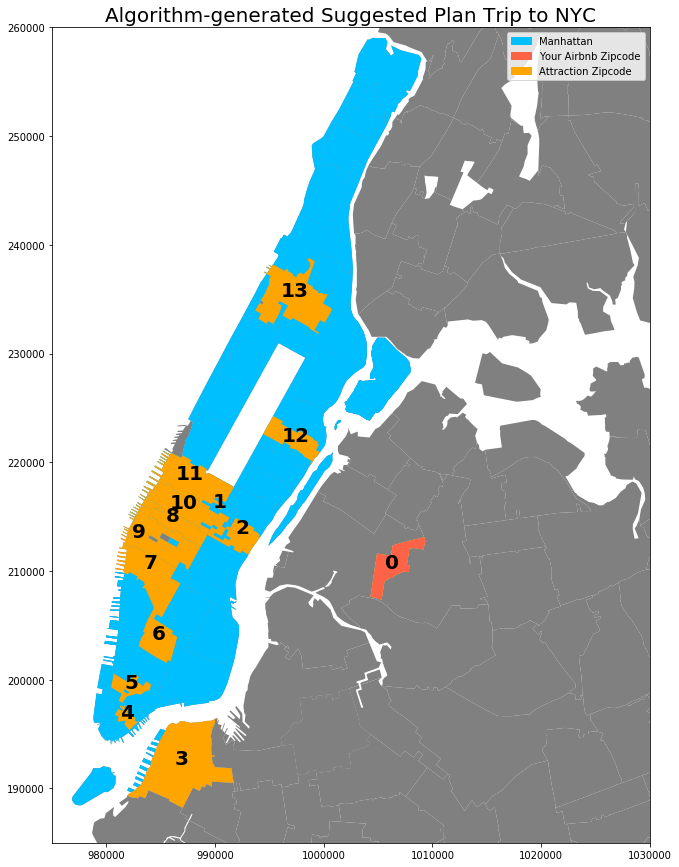

In [41]:
plt.figure(figsize=(15,15))

ax = plt.subplot()
x1 = nyc_zipcode.plot(ax=ax, color='grey', legend=True)
x2 = manhat.plot(ax=ax, color='deepskyblue', legend=True)
x3 = model_tour_area.plot(ax=ax, color='orange', legend=True)
x4 = model_tour_area[model_tour_area['zcta'] == yourairbnb_zipcode].plot(ax=ax, color='tomato')

plt.ylim([185000, 260000])
plt.xlim([975000, 1030000])
plt.title("Algorithm-generated Suggested Plan Trip to NYC", fontsize=20, color='black')

# label the legend
teal_patch = mpatches.Patch(color='deepskyblue', label='Manhattan')
red_patch = mpatches.Patch(color='tomato', label='Your Airbnb Zipcode')
orange_patch = mpatches.Patch(color='orange', label='Attraction Zipcode')

plt.legend(handles=[teal_patch, red_patch, orange_patch])


# label the route order
# https://stackoverflow.com/questions/38899190/geopandas-label-polygons
model_tour_area['coords'] = model_tour_area['geometry'].apply(lambda x: x.representative_point().coords[:])
model_tour_area['coords'] = [coords[0] for coords in model_tour_area['coords']]

for idx, row in model_tour_area.iterrows():
    plt.annotate(s=row['route_order'], xy=row['coords'], 
                 horizontalalignment='center', fontweight='bold', fontsize='20')

# print shortest distance
print(print_tsp_model_length)
# algorithm route order
print('\n')
print(tsp_model_order1)

In [42]:
print(print_your_route_length)
print(print_tsp_model_length)

if tsp_model_length < your_route_length:
    print('Computer won')
else:
    print('Congratulations! You won')

Your route length is 22.77 mile
TSP model route length is 23.85 mile
Congratulations! You won


### <font color='royalblue'>Analysis:</font>   
I'm certainly positive that you KNOW your itinerary is the BEST route possible. Congratulations if you beat the computer by a mile !!! If not, it's OK because the computer has failed thousands of times before reaching to this level.

What the TSP model does is to calculate the distance between the points on a 2D plane, which is the coordinates we fed to the model. The contraints we apply to the model is that all the nodes must be visited but only one time, and the second node in the previous pair of nodes must be the first node of the next pair. When those conditions are satisfied, the model will sum up the length between the nodes. To evaluate the total length of the node sequence, instead of actually looking at the total calculated distance value, which is not by mile nor km but a vectorized unit, we use the a fitness value to compare the results. The sequence with the highest fitness value should be the one with the shortest total distance. 

As you may have guessed, the more nodes we add to the model the more computationally expensive the model will be. If the model is to compute all the posssible combinations then doing the summing, it will take a great amount of time. Because the TSP model is NP-hard, there is no algorithm to solve it in polynominal time. As its major drawback, there is a trade off between optimality and shorter processing time. To solve this problem, randomized optimization algorithm, more particularly Genetic Algorithm, is the suitable choice. Please visit the links below to read more about the algorithm. 

The fact that the TSP model result is not as good as yours might be because of the the parameters we set for the algorithm. Genetic algorithm is hyperparameter, meaning it requires external parameter configuration from user, and these values cannot be estimated. As the result, the result that we got from the model might be the local best result within the parameters given by us. However, it might not be the global optimal result as your solution might be. 

What is left for us to do is tuning the parameters so that hopefully we can find the true global value. To read more about the algorithm parameters, please visit the links below. In my analysis, I will explain the impact when you ajust these values:

-Mutation probability: the higher the value, the algorithm will attempt more exploration on new possibilitity instead of focusing (or converging) on one good solution so far. It sounds good since there will be a higher chance to find the global optimum, but because of the limited number of attempts per step, as we will discuss next, it spreads out the search and chances are the optimum is a random. A small value may result the model to focus on a good solution it's found recently, increasing the chance of finding the local optimum instead of global.

-Population size: research shows that after some limit, increasing population size does not guarantee better result, but definitely will make slow down the processing time. A small population means the search space is small. 

-Maximum attempts per step: the higher value the longer processing time because the model does more. Yet it doesn't guarantee the result will be better.

-Maximum number of iteration of the algorithm: the higher value the longer processing time because the model does more. Yet it doesn't guarantee the result will be better.

-Random state: leave this number as random instead of a fixed value. 

After many attempts, I found out that these followings parameters yield the best result:
- Mutation Probability is as high as 0.8
- Maximum attempt input is 700

With this paramater I once yield a result with fitness of 0.34, resulting the total distance to be 21 miles (I forgot to note down this sequence). The second best attempt is with the same parameter, the total distance is 22.62 miles

https://buildmedia.readthedocs.org/media/pdf/mlrose/stable/mlrose.pdf

https://pdfs.semanticscholar.org/080f/f5f7eea2cf18d13ab939fa5a2d7e0f12e234.pdf

https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models

http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

https://towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.735.8064&rep=rep1&type=pdf

https://judemolloy.com/geneticalgorithm.html#services

#### Find the Best Paramter Configuration for the Optimization Model

# <font color='tomato'>Conclusion:</font>

Findings Summary: 

- The relationship between price, quality and distance is not linear. Higher price or good location doesn't guarantee good quality. 

- Genetic algorithm model is computationally expensive if we are trying to search for the optimum for the TSP. Higher mutation probability allows us to find a better optimum, but doesn't guarantee a global optimum and the result cannot be redo twice due to randomness  

                                                #End of Notebook